<a href="https://colab.research.google.com/github/rajiv256/cs531_project_1/blob/main/cs531_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Global Variables

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Distances

In [3]:
def dtw(T1, T2):
    
    
    """
    This is code with running time O(|T1|*|T2|) and space O(|T2|)
    It returns only the value for dtw(T1,T2)
    Below is code with running time O(|T1|*|T2|) and space O(|T1|*|T2|), that can also return the monotone assignment
    
    memo = [0] * len(T2)
    memo[0] .append(dist(T1[0], T2[0]))
    for col in range(1, len(T2)):
        memo[i] = memo[col - 1] + dist(T1[0], T2[col])
        
    for row in range(1, len(T1)):
        temp = memo[0]
        memo[0] = memo[0] + dist(T1[row], T2[0])
        for col in range(1, len(T2)):
            store = memo[col]
            
            memo[col] = dist(T1[row], T2[col]) + min(temp, memo[col-1], memo[col])
            temp = store
            
    return memo[-1]
    """
    
    #We store in matrix[row][col][0] the minimal dtw when we assign only the first "row" points in T1 
    #and the first "col" points in T2.
    #matrix[row][col] = dist(T1[row], T2[col]) + min(matrix[row-1][col-1], matrix[row-1][col], matrix[row][col-1])
    
    #Note that an assignment of the first "row" points in T1 and the first "col" points in T2, 
    #always assigns the last point of T1 to the last point of T2.
    #Note as well that the assignment of points is monotone and thus it is nondecreasing in both indices
    #i.e. assignment[i][0] <= assignment[i + 1][0], and assignment[i][1] <= assignment[i + 1][1]
    #That allows us to efficiently store only the differences between assignment[i + 1] - assignment[i]
    
    #Thus we store in matrix[row][col][1] the previous tuple of points in the assignment 
    #E.g. if matrix[row-1][col-1] ==  min(matrix[row-1][col-1], matrix[row-1][col], matrix[row][col-1]),
    #then we asssign (row-1, col-1), and store in matrix[row][col][1] the vector (-1,-1) since (row-1, col-1) = (row, col) + (-1,-1)
    
    #if matrix[row-1][col] ==  min(matrix[row-1][col-1], matrix[row-1][col], matrix[row][col-1]),
    #then we asssign (row-1, col), and store in matrix[row][col][1] the vector (-1,0) since (row-1, col) = (row, col) + (-1,0)
    
    matrix = [[[] for i in range(len(T2))] for j in range(len(T1))]
    matrix[0][0].append(dist(T1[0], T2[0]))
    for col in range(1, len(T2)):
        matrix[0][col].append(matrix[0][col - 1][0] + dist(T1[0], T2[col]))
        matrix[0][col].append((0,-1))
    for row in range(1, len(T1)):
        matrix[row][0].append(matrix[row - 1][0][0] + dist(T1[row], T2[0]))
        matrix[row][0].append((-1,0))
        
    for row in range(1, len(T1)):
        for col in range(1, len(T2)):
            recursive = min(matrix[row-1][col-1][0], matrix[row-1][col][0], matrix[row][col-1][0])
            
            matrix[row][col].append(dist(T1[row], T2[col]) + recursive)
            
            if matrix[row-1][col-1][0] == recursive:
                matrix[row][col].append((-1,-1))
            elif matrix[row-1][col][0] == recursive:
                matrix[row][col].append((-1,0))
            else:
                matrix[row][col].append((0,-1))
    
    #The moves that we store in matrix[i][j][1] are essentially pointers to the next tuple of points in @assignment
    #We traverse through those pointers from the bottom right corner (len(T1)- 1, len(T2) -1) until we reach (0,0).
    
    row , col = len(T1) -1, len(T2) -1
    assignment = [(row,col)]
    while (row,col) != (0,0):
        move = matrix[row][col][1]
        row = row + move[0]
        col = col + move[1]
        assignment.append((row,col))
        
    return matrix[-1][-1][0], assignment

def dfd(T1, T2):
    
    matrix = [[[] for i in range(len(T2))] for j in range(len(T1))]
    matrix[0][0].append(dist(T1[0], T2[0]))
    for col in range(1, len(T2)):
        matrix[0][col].append(max(matrix[0][col - 1][0], dist(T1[0], T2[col])))
        matrix[0][col].append((0,-1))
    for row in range(1, len(T1)):
        matrix[row][0].append(max(matrix[row -1][0][0], dist(T1[row], T2[0])))
        matrix[row][0].append((-1,0))
        
    for row in range(1, len(T1)):
        for col in range(1, len(T2)):
            recursive = min(matrix[row-1][col-1][0], matrix[row-1][col][0], matrix[row][col-1][0])
            
            matrix[row][col].append(max(dist(T1[row], T2[col]), recursive))
            
            if matrix[row-1][col-1][0] == recursive:
                matrix[row][col].append((-1,-1))
            elif matrix[row-1][col][0] == recursive:
                matrix[row][col].append((-1,0))
            else:
                matrix[row][col].append((0,-1))
    
    row , col = len(T1) -1, len(T2) -1
    assignment = [(row,col)]
    while (row,col) != (0,0):
        move = matrix[row][col][1]
        row = row + move[0]
        col = col + move[1]
        assignment.append((row,col))
        
    
    return matrix[-1][-1][0], assignment

def dist(p,q):
    return (p[0] - q[0]) * (p[0] - q[0]) + (p[1] - q[1]) * (p[1] - q[1])

In [4]:
T1 = [[2.1528258009133423, 39.928559077994336], [4.647866589959677, 39.64780624386843], [11.898642946750682, 41.63206128804344], [15.726165297734324, 36.05724150539296], [18.557827345122377, 40.11710460746173], [20.39324892032885, 40.41894870225849], [23.93363772618855, 41.80654250446041], [24.795928009022074, 40.95441045309481], [33.829816600734915, 37.56899354282297], [36.36405536424457, 37.83404055097146], [39.02119417876203, 37.62893662971022], [41.36428411650761, 39.27784213899114], [47.13114231258418, 38.376802156195225], [46.740288655857505, 38.28599982867999], [53.37809242934663, 35.729322675103155], [57.645146849476745, 39.782342857479584], [64.45643110020353, 40.7546622322405], [60.4804857552955, 41.86491777538794], [64.88100271594271, 40.066326679717385]]
T2 = [[2.172278245340232, 16.073950141614443], [8.231413636318653, 17.397971866059713], [12.084155569324675, 11.902888640897244], [16.41705862513891, 13.884552536746936], [20.39755197314447, 15.264276751490838], [21.822812402046946, 15.79175824742101], [31.188573323402423, 14.170271056517382], [35.648333717148795, 15.447419764543207], [36.74704074852836, 13.160089800455848], [39.52567236908733, 14.715485873043567], [45.427437674525365, 14.547430037544265], [48.19894173144, 16.43543393014399], [53.1298754931151, 14.199951190186653], [53.484008816238344, 13.648377277391493], [64.37349604796216, 13.661172695102966], [65.6548004169061, 15.418074772217677]]

d, assignment = dfd(T1, T2)
assignment

[(18, 15),
 (17, 15),
 (16, 15),
 (15, 15),
 (14, 14),
 (13, 13),
 (12, 12),
 (11, 11),
 (10, 10),
 (9, 9),
 (8, 8),
 (8, 7),
 (8, 6),
 (7, 5),
 (6, 5),
 (5, 5),
 (4, 5),
 (3, 4),
 (3, 3),
 (3, 2),
 (2, 1),
 (1, 0),
 (0, 0)]

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Utils

In [6]:
import pandas as pd
import random as rnd

def draw_a_trajectory(dataset='highway'):
    '''Returns a list of sorted points from a dataset.'''
    PATH = '/content/highway.csv' if dataset=='highway' else '/content/energy.csv'
    df = pd.read_csv(PATH)
    ids = list(set(df['id']))
    select_one = rnd.randint(0, len(ids))
    pts = list(df[df['id']==select_one][['x', 'y']].values)
    pts = [list(pt) for pt in pts]
    id = ids[select_one]
    return id, pts

# Plotting Utils

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Plot an assignment

def plot_trajectory(T, linestyle='solid', color=None): # or dotted
    data = {
        'x':[], 'y':[]
    }
    for pt in T:
        data['x'].append(pt[0])
        data['y'].append(pt[1])
    g = sns.lineplot(data=data, x='x', y='y', markers=True, linestyle=linestyle, color=color)
    return g

def plot_assignment(T1, T2, d, assignment, id1, id2):
    g1 = plot_trajectory(T1, linestyle="solid")
    g2 = plot_trajectory(T2, linestyle="solid")
    for item in assignment:
        joining_trajectory = [T1[item[0]], T2[item[1]]]
        g = plot_trajectory(joining_trajectory, linestyle='dashdot')



In [16]:
# highway_df = pd.read_csv('/content/highway.csv', sep=',')
# print(f'Highway dataset:\nNo. of points: {len(highway_df)}\nNo. of lanes: {len(set(highway_df["lane"]))} \
#       \nNo. of trajectories: {len(set(highway_df["id"]))}')

# 3.2.1

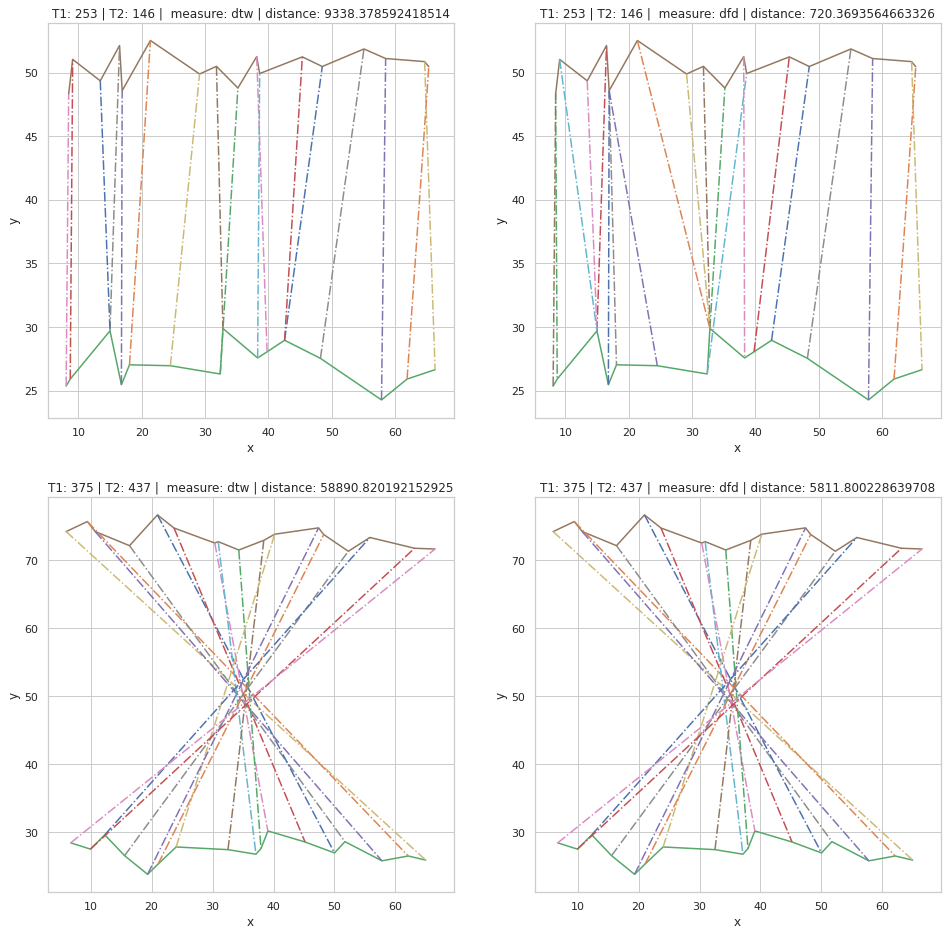

In [22]:
fig = plt.figure(figsize = (16,16))
plt.subplots_adjust(hspace=0.2)
iter = 1
while iter <= 4:
    id1, T1 = draw_a_trajectory('highway')
    id2, T2 = draw_a_trajectory('highway')

    ax = fig.add_subplot(2, 2, iter)
    
    d, assignment = dtw(T1, T2)
    plot_assignment(T1, T2, d, assignment, id1, id2)
    ax.set_title(f'T1: {id1} | T2: {id2} |  measure: dtw | distance: {d}')

    iter += 1
    ax = fig.add_subplot(2, 2, iter)
    
    d, assignment = dfd(T1, T2)
    plot_assignment(T1, T2, d, assignment, id1, id2)
    ax.set_title(f'T1: {id1} | T2: {id2} |  measure: dfd | distance: {d}')
    iter += 1